Setup and Install Dependencies

In [ ]:
# Install Ultralytics YOLOv8
!pip install ultralytics --quiet
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultraly

Define Dataset Paths

In [ ]:
# Define base path to the Roboflow-exported dataset
base_path = "/content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8"

# Check structure
for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(base_path, split, 'images')
    label_dir = os.path.join(base_path, split, 'labels')

    img_count = len([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))])
    label_count = len([f for f in os.listdir(label_dir) if f.endswith('.txt')])

    print(f"{split.upper()} set:")
    print(f"  - Images: {img_count}")
    print(f"  - Labels: {label_count}")
    print("-" * 30)


TRAIN set:
  - Images: 2583
  - Labels: 2582
------------------------------
VALID set:
  - Images: 124
  - Labels: 124
------------------------------
TEST set:
  - Images: 246
  - Labels: 246
------------------------------


Create data.yaml for YOLOv8

In [ ]:
data_yaml = """
train: /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/train
val: /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/valid
test: /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/test

nc: 6
names: ['Helm', 'Jas Pengaman', 'Kacamata Pelindung', 'Masker', 'Sarung Tangan', 'Sepatu']

roboflow:
  workspace: budiyono-smqxz
  project: apd
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/budiyono-smqxz/apd/dataset/1
"""

with open('/content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/data.yaml', 'w') as f:
    f.write(data_yaml)


Train YOLOv8 Model

In [ ]:
model = YOLO('yolov8n.pt')  # You can also try yolov8s.pt or yolov8m.pt
model.train(data='/content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/data.yaml', epochs=30, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 83.7MB/s]


Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

100%|██████████| 755k/755k [00:00<00:00, 18.5MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752482  ultralytics.nn.modules.head.Detect           [6, [64, 128, 256]]           
Model summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 73.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 28.1 KB)


train: Scanning /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/train/labels.cache... 2582 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2583/2583 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.7±0.5 ms, read: 0.1±0.0 MB/s, size: 30.4 KB)


val: Scanning /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.08G      1.231      2.062      1.315         46        640: 100%|██████████| 162/162 [15:42<00:00,  5.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        124        535      0.875      0.858      0.919       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.56G       1.03      1.068      1.156         33        640: 100%|██████████| 162/162 [00:49<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        124        535      0.883      0.909       0.94      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.56G     0.9844     0.9155      1.131         54        640: 100%|██████████| 162/162 [00:49<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        124        535      0.893      0.916       0.95      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.56G     0.9699      0.826      1.119         36        640: 100%|██████████| 162/162 [00:48<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        124        535      0.867      0.915      0.933       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.56G     0.9422     0.7638      1.107         35        640: 100%|██████████| 162/162 [00:48<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]

                   all        124        535       0.94      0.923      0.969      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.57G     0.9288     0.7162      1.097         67        640: 100%|██████████| 162/162 [00:49<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        124        535      0.874      0.927      0.964       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.58G     0.8943     0.6598      1.077         27        640: 100%|██████████| 162/162 [00:48<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        124        535      0.938       0.95      0.975       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.59G     0.8657      0.624      1.064         71        640: 100%|██████████| 162/162 [00:48<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        124        535      0.948      0.926      0.974      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.59G     0.8542     0.6039       1.06         27        640: 100%|██████████| 162/162 [00:49<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        124        535       0.96      0.951       0.98       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       2.6G     0.8389     0.5756      1.047         64        640: 100%|██████████| 162/162 [00:48<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        124        535      0.978       0.95      0.979      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.61G     0.8306     0.5631      1.045         37        640: 100%|██████████| 162/162 [00:48<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        124        535      0.954      0.959      0.977      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.62G     0.8059     0.5387      1.032         63        640: 100%|██████████| 162/162 [00:49<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        124        535      0.962      0.958      0.982      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.62G     0.7926     0.5283      1.026         45        640: 100%|██████████| 162/162 [00:48<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        124        535       0.96      0.942      0.981      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.63G     0.7851     0.5191      1.021         26        640: 100%|██████████| 162/162 [00:48<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.64it/s]

                   all        124        535      0.963      0.952      0.982      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.63G     0.7789     0.5097       1.02         81        640: 100%|██████████| 162/162 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        124        535      0.967      0.955       0.98      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.64G     0.7599     0.4892      1.009         44        640: 100%|██████████| 162/162 [00:47<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        124        535      0.909       0.94      0.983      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.64G     0.7507     0.4821      1.007         64        640: 100%|██████████| 162/162 [00:47<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        124        535      0.971      0.962      0.983      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.66G     0.7319     0.4651     0.9968         59        640: 100%|██████████| 162/162 [00:49<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all        124        535      0.966      0.963      0.978      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.66G     0.7275       0.46     0.9925         46        640: 100%|██████████| 162/162 [00:48<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        124        535      0.954      0.967      0.981      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.66G     0.7225     0.4546     0.9914         33        640: 100%|██████████| 162/162 [00:48<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]

                   all        124        535      0.958      0.967      0.984      0.789


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.66G     0.6593     0.3865     0.9528         38        640: 100%|██████████| 162/162 [00:48<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        124        535      0.969      0.967      0.986      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.66G     0.6369     0.3706     0.9406         18        640: 100%|██████████| 162/162 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        124        535      0.953       0.98      0.985      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.66G     0.6281     0.3624     0.9331         28        640: 100%|██████████| 162/162 [00:46<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        124        535      0.963      0.964      0.983      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.66G     0.6117     0.3515       0.93         38        640: 100%|██████████| 162/162 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        124        535      0.968      0.978      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.66G     0.6062     0.3462     0.9237         22        640: 100%|██████████| 162/162 [00:47<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        124        535      0.964      0.972      0.986      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.66G     0.5866     0.3385     0.9154         31        640: 100%|██████████| 162/162 [00:45<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        124        535      0.961      0.973      0.981      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.66G     0.5734     0.3302     0.9108         34        640: 100%|██████████| 162/162 [00:47<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        124        535      0.954       0.97      0.984      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.66G     0.5573     0.3178     0.9011         30        640: 100%|██████████| 162/162 [00:45<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        124        535      0.959      0.978      0.985      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.66G     0.5509     0.3161     0.8997         29        640: 100%|██████████| 162/162 [00:46<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        124        535      0.967      0.977      0.983      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.66G     0.5389     0.3073     0.8958         29        640: 100%|██████████| 162/162 [00:45<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        124        535      0.966      0.971      0.985      0.809



30 epochs completed in 0.666 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


                   all        124        535      0.961      0.977      0.986       0.81
                  Helm         61         61      0.988          1      0.995      0.831
          Jas Pengaman        100        100      0.995          1      0.995      0.953
    Kacamata Pelindung         87         87      0.944      0.973       0.98      0.642
                Masker        124        124      0.989      0.992      0.995      0.779
         Sarung Tangan         79        144      0.935      0.899      0.953      0.767
                Sepatu         19         19      0.912          1      0.995      0.887
Speed: 0.5ms preprocess, 4.1ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c8a54151510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

Visualize Training Metrics

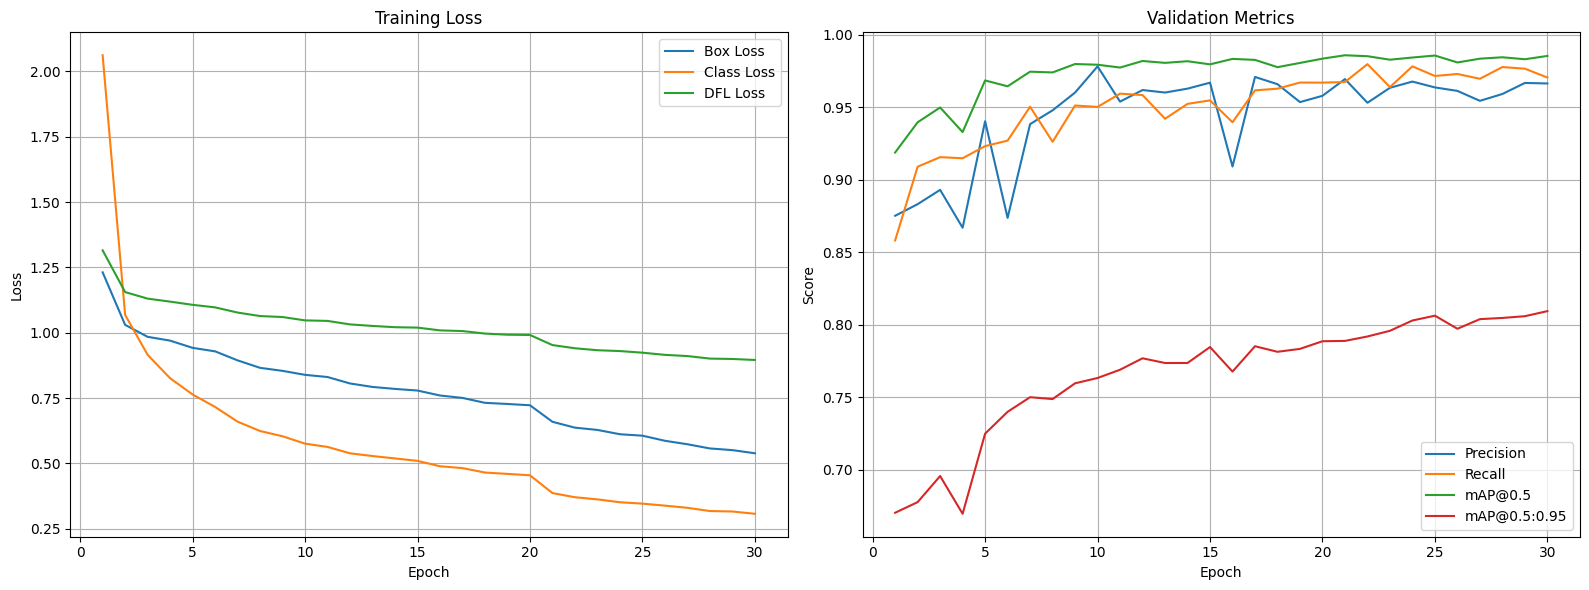

In [ ]:
# Locate latest training run
run_dir = sorted([d for d in os.listdir('runs/detect') if 'train' in d])[-1]
csv_path = f"runs/detect/{run_dir}/results.csv"

df = pd.read_csv(csv_path)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Run Inference on Test Images

In [ ]:
# Load best model
best_model_path = f"runs/detect/{run_dir}/weights/best.pt"
model = YOLO(best_model_path)



image 1/1 /content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/test/images/106_JPG_jpg.rf.d389c74dd3cf45e52c1254a5d133e049.jpg: 640x640 1 Helm, 1 Jas Pengaman, 1 Kacamata Pelindung, 1 Masker, 2 Sarung Tangans, 16.2ms
Speed: 3.8ms preprocess, 16.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


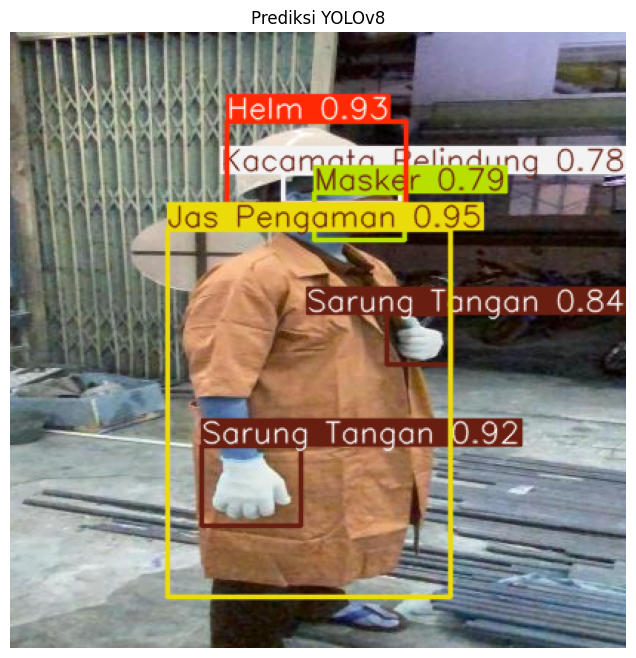

📌 Label Prediksi:
- Jas Pengaman (0.95)
- Helm (0.93)
- Sarung Tangan (0.92)
- Sarung Tangan (0.84)
- Masker (0.79)
- Kacamata Pelindung (0.78)


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Jalankan prediksi pada satu gambar
image_path = os.path.join(base_path, 'test/images/106_JPG_jpg.rf.d389c74dd3cf45e52c1254a5d133e049.jpg')
results = model(image_path, conf=0.5)

# Ambil gambar dengan anotasi yang sudah diprediksi
annotated_img = results[0].plot()

# Tampilkan gambar
plt.figure(figsize=(10, 8))
plt.imshow(annotated_img)
plt.axis('off')
plt.title("Prediksi YOLOv8")
plt.show()

# Tampilkan label prediksi dalam bentuk teks
print("📌 Label Prediksi:")
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    label = model.names[cls_id]
    print(f"- {label} ({conf:.2f})")


Download Trained Model

In [ ]:
from google.colab import files

files.download(best_model_path)
files.download('/content/drive/MyDrive/Datathon/DATA APD/APD.v1-v1.yolov8/data.yaml')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>